<a href="https://colab.research.google.com/github/kunalshenoy1604/College-B.Tech/blob/main/HeartFailureAnalysis_ByKunalShenoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df=pd.read_csv("/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [120]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [121]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [122]:
df.shape

(299, 13)

In [123]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [124]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [126]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

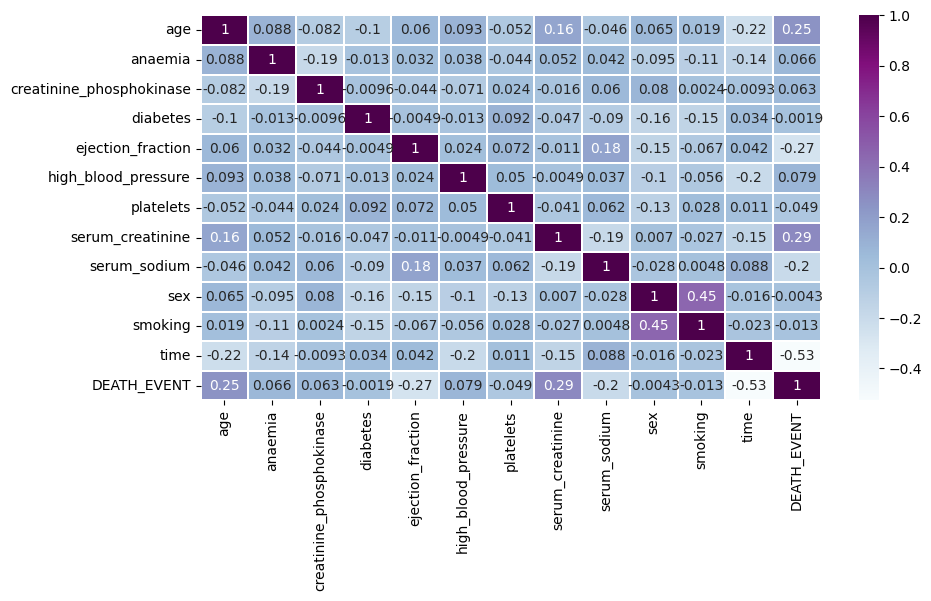

In [127]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BuPu", annot=True,linewidth=1.22, linecolor="white",cbar=True)

<Axes: >

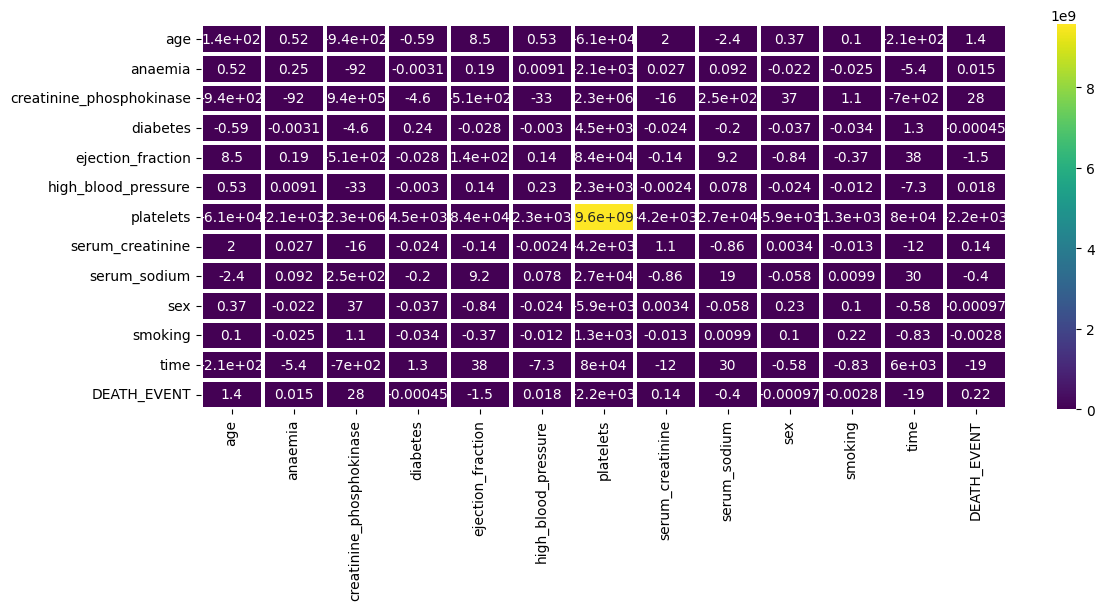

In [128]:
plt.figure(figsize=(13,5))
sns.heatmap(df.cov(),cmap="viridis", annot=True,linewidth=1.5, linecolor="white",cbar=True)

In [129]:
X=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [131]:
ValueCounts=df['DEATH_EVENT'].value_counts()
ValueCounts

0    203
1     96
Name: DEATH_EVENT, dtype: int64

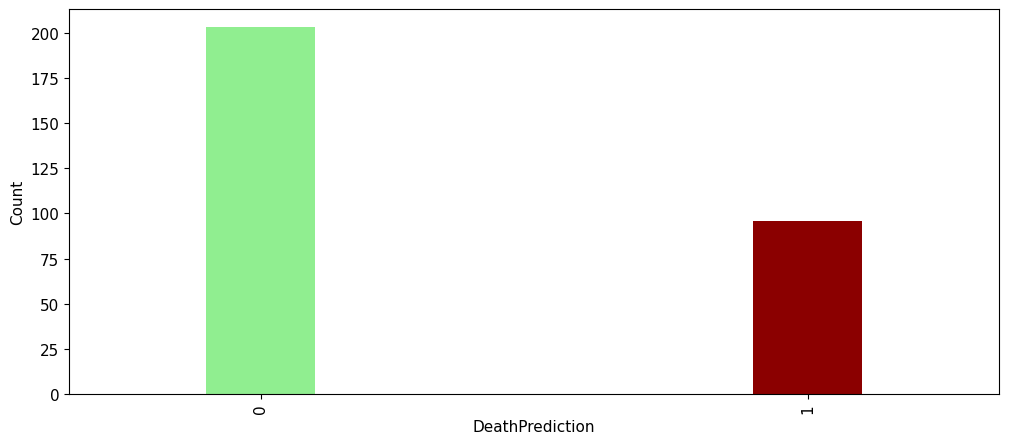

In [134]:
ax=ValueCounts.plot(kind='bar',figsize=(12,5),width=0.20,color=['lightgreen','darkred'],fontsize=11)
ax.set_xlabel("DeathPrediction",fontsize=11)
ax.set_ylabel("Count",fontsize=11)
plt.show()

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)


In [160]:
scaler=StandardScaler()
X_train_SCALED= scaler.fit_transform(X_train)
X_test_SCALED= scaler.fit_transform(X_test)

LOGISTIC REGRESSION

In [161]:
Logistic_Regression_classifier = LogisticRegression()
Logistic_Regression_classifier.fit(X_train_SCALED, y_train)
y_pred_logistic_regression = Logistic_Regression_classifier.predict(X_test_SCALED)

In [162]:
accuracy=accuracy_score(y_pred_logistic_regression,y_test)
print('Accuracy (Logistic Regression) :',accuracy)

Accuracy (Logistic Regression) : 0.9


In [246]:
precision=precision_score(y_pred_logistic_regression,y_test)
print('Precision (Logistic Regression) :',precision)

Precision (Logistic Regression) : 0.75


In [247]:
recall=recall_score(y_pred_logistic_regression,y_test)
print('Recall (Logistic Regression) :',recall)

Recall (Logistic Regression) : 0.9375


In [248]:
f1=f1_score(y_pred_logistic_regression,y_test)
print('F1 Score (Logistic Regression) :',f1)

F1 Score (Logistic Regression) : 0.8333333333333334


In [249]:
classification_report_LR=classification_report(y_pred_logistic_regression,y_test)
print(classification_report_LR)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.75      0.94      0.83        16

    accuracy                           0.90        60
   macro avg       0.86      0.91      0.88        60
weighted avg       0.91      0.90      0.90        60



DECISION TREE CLASSIFIER

In [183]:
Decision_tree_classifier=DecisionTreeClassifier(max_depth = 7)
Decision_tree_classifier.fit(X_train_SCALED,y_train)
y_pred_decision_tree=Decision_tree_classifier.predict(X_test_SCALED)

In [184]:
accuracy=accuracy_score(y_pred_decision_tree,y_test)
print('Accuracy (Decision Tree) :',accuracy)

Accuracy (Decision Tree) : 0.8833333333333333


In [242]:
precision=precision_score(y_pred_decision_tree,y_test)
print('Precision (Decision Tree) :',precision)

Precision (Decision Tree) : 0.8


In [243]:
recall=recall_score(y_pred_decision_tree,y_test)
print('Recall (Decision Tree) :',recall)

Recall (Decision Tree) : 0.8421052631578947


In [244]:
f1=f1_score(y_pred_decision_tree,y_test)
print('F1 Score (Decision Tree) :',f1)

F1 Score (Decision Tree) : 0.8205128205128205


In [245]:
classification_report_DT=classification_report(y_pred_decision_tree,y_test)
print(classification_report_DT)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.80      0.84      0.82        19

    accuracy                           0.88        60
   macro avg       0.86      0.87      0.87        60
weighted avg       0.89      0.88      0.88        60



RANDOM FOREST CLASSIFIERS

In [197]:
Random_Forest_Classifier=RandomForestClassifier(n_estimators=100)
Random_Forest_Classifier.fit(X_train_SCALED, y_train)
y_pred_random_forest=Random_Forest_Classifier.predict(X_test_SCALED)

In [198]:
accuracy=accuracy_score(y_pred_random_forest,y_test)
print('Accuracy (Random Forest Classifiers) :',accuracy)

Accuracy (Random Forest Classifiers) : 0.8666666666666667


In [238]:
precision = precision_score(y_pred_random_forest,y_test)
print("Precision (Random Forest Classifiers) :",precision)

Precision (Random Forest Classifiers) : 0.75


In [239]:
recall = recall_score(y_pred_random_forest,y_test)
print("Recall (Random Forest Classifiers) :",recall)

Recall (Random Forest Classifiers) : 0.8333333333333334


In [240]:
f1=f1_score(y_pred_random_forest,y_test)
print("F1 scores (Random Forest Classifiers) :",f1)

F1 scores (Random Forest Classifiers) : 0.7894736842105262


In [241]:
classification_report_RFC=classification_report(y_pred_random_forest,y_test)
print(classification_report_RFC)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.75      0.83      0.79        18

    accuracy                           0.87        60
   macro avg       0.84      0.86      0.85        60
weighted avg       0.87      0.87      0.87        60



SUPPORT VECTOR MACHINE

In [207]:
Support_Vector_Machine=SVC(kernel='linear',C=10)
Support_Vector_Machine.fit(X_train_SCALED,y_train)
y_pred_svm=Support_Vector_Machine.predict(X_test_SCALED)

In [208]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy (Support Vector Machine) :",accuracy)

Accuracy (Support Vector Machine) : 0.9


In [229]:
precision = precision_score(y_test, y_pred_svm)
print("Precision (Support Vector Machine) :",precision)

Precision (Support Vector Machine) : 0.9375


In [231]:
recall = recall_score(y_test, y_pred_svm)
print("Recall (Support Vector Machine)",recall)

Recall (Support Vector Machine) 0.75


In [232]:
f1 = f1_score(y_test, y_pred_svm)
print("F1 Score (Support Vector Machine)",f1)

F1 Score (Support Vector Machine) 0.8333333333333334


In [236]:
classification_report_svm=classification_report(y_test, y_pred_svm)
print(classification_report_svm)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.94      0.75      0.83        20

    accuracy                           0.90        60
   macro avg       0.91      0.86      0.88        60
weighted avg       0.90      0.90      0.90        60



NAIVE BAYES CLASSIFICATION

In [212]:
Naive_Bayes_Classifier=GaussianNB()
Naive_Bayes_Classifier.fit(X_train_SCALED,y_train)
y_pred_NB=Naive_Bayes_Classifier.predict(X_test_SCALED)

In [213]:
accuracy = accuracy_score(y_test, y_pred_NB)
print("Accuracy (Naive Bayes) :",accuracy)

Accuracy (Naive Bayes) : 0.8


In [227]:
precision = precision_score(y_test, y_pred_NB)
print("Precision (Naive Bayes) :",precision)

Precision (Naive Bayes) : 0.9


In [228]:
recall = recall_score(y_test, y_pred_NB)
print("Recall (Naive Bayes)",recall)

Recall (Naive Bayes) 0.45


In [230]:
f1 = f1_score(y_test, y_pred_NB)
print("F1 score (Naive Bayes)",f1)

F1 score (Naive Bayes) 0.6


In [237]:
classification_report_NB=classification_report(y_test, y_pred_NB)
print(classification_report_NB)

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        40
           1       0.90      0.45      0.60        20

    accuracy                           0.80        60
   macro avg       0.84      0.71      0.73        60
weighted avg       0.82      0.80      0.78        60



ENSEMBLE LEARNING

In [220]:
Logistic_Regression_classifier = LogisticRegression()
Support_Vector_Machine = SVC(probability=True)
Random_Forest_Classifier = RandomForestClassifier()
Naive_Bayes_Classifier = GaussianNB()
ensemble = VotingClassifier(estimators=[('LRC', Logistic_Regression_classifier), ('SVM', Support_Vector_Machine), ('RFC', Random_Forest_Classifier) ,('NBC', Naive_Bayes_Classifier)], voting='soft')
ensemble.fit(X_train_SCALED, y_train)
ensemble_predictions = ensemble.predict(X_test_SCALED)

In [222]:
accuracy = accuracy_score(y_test, ensemble_predictions)
accuracy

0.9

In [223]:
precision = precision_score(y_test, ensemble_predictions)
precision

1.0

In [225]:
recall = recall_score(y_test, ensemble_predictions)
recall


0.7

In [226]:
f1 = f1_score(y_test, ensemble_predictions)
f1

0.8235294117647058